In [1]:
### Try to replicate Daniel's methods:

import netCDF4
import numpy as np
import pandas
import glob
from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from scipy.stats import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from get_LWPCMIP5data import *
from get_LWPCMIP6data import *
from get_OBSLRMdata import *
from useful_func_cy import *
from fitLRM_cy1 import *
from fitLRM_cy2 import *

from fitLRMobs import *
from useful_func_cy import *
from calc_Radiation_LRM_1 import *
from calc_Radiation_LRM_2 import *

from area_mean import *
from binned_cyFunctions5 import *
from useful_func_cy import *

# OBServational constraint on the radiation and LWP:

from calc_LRMobs_metric import *
from calc_Radiation_OBS_2 import *
from Aploting_Sep11 import *
# import numpy as np


In [2]:
# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set are-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9

path1 = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'
path6 = '/glade/scratch/chuyan/Plots/CMIP_R_lwp_3/'

In [3]:
valid_range1=[2003, 1, 15]
valid_range2=[2016, 12, 31]
valid_range3=[2003, 1, 15]
valid_range4=[2005, 7, 31]


# calc_Radiation_OBS_2; OBS radiation explore

In [5]:
coef_dict_Alpha_cre_training, coef_dict_Albedo_training, coef_dict_Albedo_bin_training, dict_Alpha_cre_predict, coef_dict_Albedo_predict, coef_dict_Albedo_bin_predict = calc_Radiation_OBS_2(s_range, x_range, y_range, valid_range1 = valid_range1, valid_range2 = valid_range2, valid_range3 = valid_range3, valid_range4 = valid_range4)

(42,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  return array(a, dtype, copy=False, order=order)
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  return array(a, dtype, copy=False, order=order)


Fill Value:  -999.0
(168, 45, 360)
Fill Value:  -999.0
(168, 45, 360)
Fill Value:  -999.0
(168, 45, 360)
(42,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
[2003 2004 2005]
Fill Value:  -999.0
(31, 45, 360)
Fill Value:  -999.0
(31, 45, 360)
Fill Value:  -999.0
(31, 45, 360)


/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_Radiation_OBS_2.py:73: RuntimeWarning: invalid value encountered in less_equal
  albedo_cs_training[(albedo_cs_training <= 0.08) & (albedo_cs_training >= 1.00)] = np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_Radiation_OBS_2.py:73: RuntimeWarning: invalid value encountered in greater_equal
  albedo_cs_training[(albedo_cs_training <= 0.08) & (albedo_cs_training >= 1.00)] = np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_Radiation_OBS_2.py:74: RuntimeWarning: invalid value encountered in less_equal
  Alpha_cre_training[(albedo_cs_training <= 0.08) & (albedo_cs_training >= 1.00)] = np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_Radiation_OBS_2.py:74: RuntimeWarning: invalid value encountered in greater_equal
  Alpha_cre_training[(albedo_cs_training <= 0.08) & (albedo_cs_training >= 1.00)] = np.nan
/glade/work/chuyan/Research/Cloud_CCFs

 ended cropping 
 ended cropping 
the first month in training and predict data:  1.0 1.0
threshold =  0.11
 fration of not NaN points to All points in OBS training data: 0.213994708994709


/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_Radiation_OBS_2.py:112: RuntimeWarning: invalid value encountered in less_equal
  albedo_cs_predict[(albedo_cs_predict <= 0.08) & (albedo_cs_predict >= 1.00)] = np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_Radiation_OBS_2.py:112: RuntimeWarning: invalid value encountered in greater_equal
  albedo_cs_predict[(albedo_cs_predict <= 0.08) & (albedo_cs_predict >= 1.00)] = np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_Radiation_OBS_2.py:113: RuntimeWarning: invalid value encountered in less_equal
  Alpha_cre_predict[(albedo_cs_predict <= 0.08) & (albedo_cs_predict >= 1.00)] = np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_Radiation_OBS_2.py:113: RuntimeWarning: invalid value encountered in greater_equal
  Alpha_cre_predict[(albedo_cs_predict <= 0.08) & (albedo_cs_predict >= 1.00)] = np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Cou

 model_binLWP, albedo_bin = a1 * lwp_bin + a2 * albedo_cs_bin + a3:                              OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3472.
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           2.64e-17
Time:                        16:24:06   Log-Likelihood:                 68.478
No. Observations:                  15   AIC:                            -131.0
Df Residuals:                      12   BIC:                            -128.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))



threshold =  0.15
 fration of not NaN points to All points in OBS training data: 0.5587037037037037
 model_binLWP, albedo_bin = a1 * lwp_bin + a2 * albedo_cs_bin + a3:                              OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     827.1
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           1.40e-13
Time:                        16:24:06   Log-Likelihood:                 56.762
No. Observations:                  15   AIC:                            -107.5
Df Residuals:                      12   BIC:                            -105.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err        

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


 model_binLWP, albedo_bin = a1 * lwp_bin + a2 * albedo_cs_bin + a3:                              OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     45.97
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           2.37e-06
Time:                        16:24:06   Log-Likelihood:                 37.894
No. Observations:                  15   AIC:                            -69.79
Df Residuals:                      12   BIC:                            -67.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


 
model1, alpha_cre = a1 * lwp + a2:                                OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1928.
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:24:06   Log-Likelihood:             1.9865e+05
No. Observations:              132022   AIC:                        -3.973e+05
Df Residuals:                  132020   BIC:                        -3.973e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anywa

threshold =  0.15
 fration of not NaN points to All points in OBS predict data: 0.5631275720164609
 model_binLWP, albedo_bin = a1 * lwp_bin + a2 * albedo_cs_bin + a3:                              OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1619.
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           2.53e-15
Time:                        16:24:07   Log-Likelihood:                 62.190
No. Observations:                  15   AIC:                            -118.4
Df Residuals:                      12   BIC:                            -116.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [ ]:
# get the variables for training:
inputVar_training_obs = get_OBSLRM(valid_range1=valid_range1, valid_range2=valid_range2)

# get the variables for predicting:
inputVar_predict_obs = get_OBSLRM(valid_range1=valid_range3, valid_range2=valid_range4)

# As data dictionary:
datavar_nas = ['LWP', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']   #..7 varisables except gmt (lon dimension diff)
variable_MAC = ['LWP', 'LWP_error', 'Maskarray_mac']
variable_CERES = ['rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']

# Training Data processing:
# Liquid water path, Unit in kg m^-2
LWP_training = inputVar_training_obs['lwp'] / 1000.
# 1-Sigma Liquid water path statistic error, Unit in kg m^-2
LWP_error_training = inputVar_training_obs['lwp_error'] / 1000.
# the MaskedArray of 'MAC-LWP' dataset
Maskarray_mac_training = inputVar_training_obs['maskarray_mac']
# ---

# SW radiative flux:
Rsdt_training = inputVar_training_obs['rsdt']
Rsut_training = inputVar_training_obs['rsut']
Rsutcs_training = inputVar_training_obs['rsutcs']

albedo_training = Rsut_training / Rsdt_training
albedo_cs_training = Rsutcs_training / Rsdt_training
Alpha_cre_training = albedo_training - albedo_cs_training

# abnormal values:
albedo_cs_training[(albedo_cs_training <= 0.08) & (albedo_cs_training >= 1.00)] = np.nan
Alpha_cre_training[(albedo_cs_training <= 0.08) & (albedo_cs_training >= 1.00)] = np.nan
LWP_training[LWP_training <= 0.0005] = np.nan
LWP_training[LWP_training >= np.nanpercentile(LWP_training, 99.5)] = np.nan

dict0_training_var = {'LWP': LWP_training, 'LWP_error': LWP_error_training, 'Maskarray_mac': Maskarray_mac_training, 'rsdt': Rsdt_training, 'rsut': Rsut_training, 'rsutcs': Rsutcs_training, 'albedo' : albedo_training, 'albedo_cs': albedo_cs_training, 'alpha_cre': Alpha_cre_training, 'times': inputVar_training_obs['times_ceres']}

# Crop the regions
# crop the variables to the Southern Ocean latitude range: (40 ~ 85^o S)
dict1_SO_training, lat_so, lon_so = region_cropping(dict0_training_var, ['LWP', 'LWP_error', 'Maskarray_mac'], inputVar_training_obs['lat_mac'], inputVar_training_obs['lon_mac'], lat_range =[-85., -40.], lon_range = [-180., 180.])

dict1_SO_training['lat'] = lat_so
dict1_SO_training['lon'] = lon_so

# As data dictionary:
datavar_nas = ['LWP', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']   #..7 varisables except gmt (lon dimension diff)
variable_MAC = ['LWP', 'LWP_error', 'Maskarray_mac']
variable_CERES = ['rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']

# Predict Data processing:
# Liquid water path, Unit in kg m^-2
LWP_predict = inputVar_predict_obs['lwp'] / 1000.
# 1-Sigma Liquid water path statistic error, Unit in kg m^-2
LWP_error_predict = inputVar_predict_obs['lwp_error'] / 1000.
# the MaskedArray of 'MAC-LWP' dataset
Maskarray_mac_predict = inputVar_predict_obs['maskarray_mac']
# ---

# SW radiative flux:
Rsdt_predict = inputVar_predict_obs['rsdt']
Rsut_predict = inputVar_predict_obs['rsut']
Rsutcs_predict = inputVar_predict_obs['rsutcs']

albedo_predict = Rsut_predict / Rsdt_predict
albedo_cs_predict = Rsutcs_predict / Rsdt_predict
Alpha_cre_predict = albedo_predict - albedo_cs_predict

# abnormal values
albedo_cs_predict[(albedo_cs_predict <= 0.08) & (albedo_cs_predict >= 1.00)] = np.nan
Alpha_cre_predict[(albedo_cs_predict <= 0.08) & (albedo_cs_predict >= 1.00)] = np.nan
LWP_predict[LWP_predict <= 0.0005] = np.nan
LWP_predict[LWP_predict >= np.nanpercentile(LWP_predict, 99.5)] = np.nan

dict0_predict_var = {'LWP': LWP_predict, 'LWP_error': LWP_error_predict, 'Maskarray_mac': Maskarray_mac_predict, 'rsdt': Rsdt_predict, 'rsut': Rsut_predict, 'rsutcs': Rsutcs_predict, 'albedo' : albedo_predict, 'albedo_cs': albedo_cs_predict, 'alpha_cre': Alpha_cre_predict, 'times': inputVar_predict_obs['times_ceres']}

# Crop the regions
# crop the variables to the Southern Ocean latitude range: (40 ~ 85^o S)
dict1_SO_predict, lat_so, lon_so = region_cropping(dict0_predict_var, ['LWP', 'LWP_error', 'Maskarray_mac'], inputVar_predict_obs['lat_mac'], inputVar_predict_obs['lon_mac'], lat_range =[-85., -40.], lon_range = [-180., 180.])

dict1_SO_predict['lat'] = lat_so
dict1_SO_predict['lon'] = lon_so

dict2_training_var = deepcopy(dict1_SO_training)
dict2_predict_var = deepcopy(dict1_SO_predict)

print('the first month in training and predict data: ', dict1_SO_training['times'][0,:][1], dict1_SO_predict['times'][0,:][1])


# Choose time frame: January:
# Choose time frame: January:
if dict1_SO_training['times'][0,:][1] == 1.0:   # Jan
    shape_mon_training_raw = dict1_SO_training['LWP'][0::12, :,:].shape   # January data shape
    for i in range(len(datavar_nas)):
        dict2_training_var[datavar_nas[i]] = dict1_SO_training[datavar_nas[i]][0::12, :, :]   # January data
else:
    shape_mon_training_raw = dict1_SO_training['LWP'][int(13 - dict1_SO_training['times'][0,:][1])::12, :,:].shape 
    for i in range(len(datavar_nas)):
        dict2_training_var[datavar_nas[i]] = dict1_SO_training[datavar_nas[i]][int(13 - dict1_SO_training['times'][0,:][1])::12, :, :]

if dict1_SO_predict['times'][0,:][1] == 1.0:   # Jan
    shape_mon_abr_raw = dict1_SO_predict['LWP'][0::12,:,:].shape   # January data shape
    for j in range(len(datavar_nas)):
        dict2_predict_var[datavar_nas[j]] = dict1_SO_predict[datavar_nas[j]][0::12, :, :]   # January data

else:
    shape_mon_abr_raw = dict1_SO_predict['LWP'][int(13 - dict1_SO_predict['times'][0,:][1])::12, :,:].shape 
    for j in range(len(datavar_nas)):
        dict2_predict_var[datavar_nas[j]] = dict1_SO_predict[datavar_nas[j]][int(13 - dict1_SO_predict['times'][0,:][1])::12, :, :]


# radiative transfer model: single regime LRM:

threshold_list = [0.12, 0.15, 0.20, 0.30, 0.35, 0.50, 1.00]
# training :

coef_dict_Albedo_training, coef_dict_Alpha_cre_training = radiative_transfer_model_obs(dict2_training_var, threshold_list, label = 'training')

# Compare to the training:
# predicting :

coef_dict_Albedo_predict, coef_dict_Alpha_cre_predict = radiative_transfer_model_obs(dict2_predict_var, threshold_list, label = 'predict')


# PLotting:
pLot_sca_sensitivity_to_albedo_cs_obs(dict2_training_var, coef_dict_Albedo_training, threshold_list, c_albedo_cs=0.08)
# return coef_dict_Alpha_cre_training, coef_dict_Albedo_training, coef_dict_Alpha_cre_predict, coef_dict_Albedo_predict

In [83]:
# get the variables for training:
inputVar_training_obs = get_OBSLRM(valid_range1=valid_range1, valid_range2=valid_range2)

# get the variables for predicting:
inputVar_predict_obs = get_OBSLRM(valid_range1=valid_range3, valid_range2=valid_range4)

# As data dictionary:
datavar_nas = ['LWP', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']   #..7 varisables except gmt (lon dimension diff)
variable_MAC = ['LWP', 'LWP_error', 'Maskarray_mac']
variable_CERES = ['rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']

# Training Data processing:
# Liquid water path, Unit in kg m^-2
LWP_training = inputVar_training_obs['lwp'] / 1000.
# 1-Sigma Liquid water path statistic error, Unit in kg m^-2
LWP_error_training = inputVar_training_obs['lwp_error'] / 1000.
# the MaskedArray of 'MAC-LWP' dataset
Maskarray_mac_training = inputVar_training_obs['maskarray_mac']
# ---

# SW radiative flux:
Rsdt_training = inputVar_training_obs['rsdt']
Rsut_training = inputVar_training_obs['rsut']
Rsutcs_training = inputVar_training_obs['rsutcs']

albedo_training = Rsut_training / Rsdt_training
albedo_cs_training = Rsutcs_training / Rsdt_training
Alpha_cre_training = albedo_training - albedo_cs_training

# abnormal values:
albedo_cs_training[(albedo_cs_training <= 0.08) & (albedo_cs_training >= 1.00)] = np.nan
Alpha_cre_training[(albedo_cs_training <= 0.08) & (albedo_cs_training >= 1.00)] = np.nan

LWP_training[LWP_training <= 0.0] = np.nan
LWP_training[LWP_training >= np.nanpercentile(LWP_training, 99.5)] = np.nan

dict0_training_var = {'LWP': LWP_training, 'LWP_error': LWP_error_training, 'Maskarray_mac': Maskarray_mac_training, 'rsdt': Rsdt_training, 'rsut': Rsut_training, 'rsutcs': Rsutcs_training, 'albedo' : albedo_training, 'albedo_cs': albedo_cs_training, 'alpha_cre': Alpha_cre_training, 'times': inputVar_training_obs['times_ceres']}

# Crop the regions
# crop the variables to the Southern Ocean latitude range: (40 ~ 85^o S)
dict1_SO_training, lat_so, lon_so = region_cropping(dict0_training_var, ['LWP', 'LWP_error', 'Maskarray_mac'], inputVar_training_obs['lat_mac'], inputVar_training_obs['lon_mac'], lat_range =[-85., -40.], lon_range = [-180., 180.])

dict1_SO_training['lat'] = lat_so
dict1_SO_training['lon'] = lon_so

# As data dictionary:
datavar_nas = ['LWP', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']   #..7 varisables except gmt (lon dimension diff)
variable_MAC = ['LWP', 'LWP_error', 'Maskarray_mac']
variable_CERES = ['rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']

# Predict Data processing:
# Liquid water path, Unit in kg m^-2
LWP_predict = inputVar_predict_obs['lwp'] / 1000.
# 1-Sigma Liquid water path statistic error, Unit in kg m^-2
LWP_error_predict = inputVar_predict_obs['lwp_error'] / 1000.
# the MaskedArray of 'MAC-LWP' dataset
Maskarray_mac_predict = inputVar_predict_obs['maskarray_mac']
# ---

# SW radiative flux:
Rsdt_predict = inputVar_predict_obs['rsdt']
Rsut_predict = inputVar_predict_obs['rsut']
Rsutcs_predict = inputVar_predict_obs['rsutcs']

albedo_predict = Rsut_predict / Rsdt_predict
albedo_cs_predict = Rsutcs_predict / Rsdt_predict
Alpha_cre_predict = albedo_predict - albedo_cs_predict

# abnormal values
albedo_cs_predict[(albedo_cs_predict <= 0.08) & (albedo_cs_predict >= 1.00)] = np.nan
Alpha_cre_predict[(albedo_cs_predict <= 0.08) & (albedo_cs_predict >= 1.00)] = np.nan

LWP_predict[LWP_predict <= 0.0] = np.nan
LWP_predict[LWP_predict >= np.nanpercentile(LWP_predict, 99.5)] = np.nan

dict0_predict_var = {'LWP': LWP_predict, 'LWP_error': LWP_error_predict, 'Maskarray_mac': Maskarray_mac_predict, 'rsdt': Rsdt_predict, 'rsut': Rsut_predict, 'rsutcs': Rsutcs_predict, 'albedo' : albedo_predict, 'albedo_cs': albedo_cs_predict, 'alpha_cre': Alpha_cre_predict, 'times': inputVar_predict_obs['times_ceres']}

# Crop the regions
# crop the variables to the Southern Ocean latitude range: (40 ~ 85^o S)
dict1_SO_predict, lat_so, lon_so = region_cropping(dict0_predict_var, ['LWP', 'LWP_error', 'Maskarray_mac'], inputVar_predict_obs['lat_mac'], inputVar_predict_obs['lon_mac'], lat_range =[-85., -40.], lon_range = [-180., 180.])

dict1_SO_predict['lat'] = lat_so
dict1_SO_predict['lon'] = lon_so

    
dict2_training_var = deepcopy(dict1_SO_training)
dict2_predict_var = deepcopy(dict1_SO_predict)

print('the first month in training and predict data: ', dict1_SO_training['times'][0,:][1], dict1_SO_predict['times'][0,:][1])


(42,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  return array(a, dtype, copy=False, order=order)
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  return array(a, dtype, copy=False, order=order)


Fill Value:  -999.0
(168, 45, 360)
Fill Value:  -999.0
(168, 45, 360)
Fill Value:  -999.0
(168, 45, 360)
(42,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
[2003 2004 2005]
Fill Value:  -999.0
(31, 45, 360)
Fill Value:  -999.0
(31, 45, 360)
Fill Value:  -999.0
(31, 45, 360)


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in less_equal
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater_equal
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less_equal
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater_equal
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in less_equal
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater_equal


 ended cropping 
 ended cropping 
the first month in training and predict data:  1.0 1.0


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in less_equal
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in greater_equal
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less_equal
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in greater_equal
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less_equal
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in greater_equal


In [85]:
# Choose time frame: January:
if dict1_SO_training['times'][0,:][1] == 1.0:   # Jan
    shape_mon_training_raw = dict1_SO_training['LWP'][0::12, :,:].shape   # January data shape
    for i in range(len(datavar_nas)):
        dict2_training_var[datavar_nas[i]] = dict1_SO_training[datavar_nas[i]][0::12, :, :]   # January data
else:
    shape_mon_training_raw = dict1_SO_training['LWP'][int(13 - dict1_SO_training['times'][0,:][1])::12, :,:].shape 
    for i in range(len(datavar_nas)):
        dict2_training_var[datavar_nas[i]] = dict1_SO_training[datavar_nas[i]][int(13 - dict1_SO_training['times'][0,:][1])::12, :, :]

if dict1_SO_predict['times'][0,:][1] == 1.0:   # Jan
    shape_mon_abr_raw = dict1_SO_predict['LWP'][0::12,:,:].shape   # January data shape
    for j in range(len(datavar_nas)):
        dict2_predict_var[datavar_nas[j]] = dict1_SO_predict[datavar_nas[j]][0::12, :, :]   # January data

else:
    shape_mon_abr_raw = dict1_SO_predict['LWP'][int(13 - dict1_SO_predict['times'][0,:][1])::12, :,:].shape 
    for j in range(len(datavar_nas)):
        dict2_predict_var[datavar_nas[j]] = dict1_SO_predict[datavar_nas[j]][int(13 - dict1_SO_predict['times'][0,:][1])::12, :, :]
print(dict2_training_var['LWP'].shape)

# radiative transfer model: single regime LRM:

threshold_list = [0.11, 0.12, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 1.00]
# training :

coef_dict_Albedo = {}
coef_dict_Alpha_cre = {}

TR_albedo_cs = threshold_list[8]
print("Albedo_cs threshold = ", TR_albedo_cs)


# copy data from dictionary:
x = deepcopy(dict2_training_var['LWP'])

y2 = deepcopy(dict2_training_var['alpha_cre'])

y1 = deepcopy(dict2_training_var['albedo'])

ck_a = deepcopy(dict2_training_var['albedo_cs'])

rsdt = deepcopy(dict2_training_var['rsdt'])

# conditions 1:
rsdt[rsdt < 10.0] = np.nan
ck_a[ck_a < 0] = np.nan
ck_a[ck_a >= TR_albedo_cs] = np.nan

# Processing 'nan' in aggregated data:
Z_training = (rsdt * ck_a * x * y2 * y1) * 1.
ind_false = np.isnan(Z_training)
ind_true = np.logical_not(ind_false)

# binned data by LWP:
# BINS_lwp = np.linspace(0.00, 0.24, 24)
# print(x[ind_true])

# mean_albedo, bin_edge1, binnumber_albedo = binned_statistic(x[ind_true], y1[ind_true], statistic='mean', bins = BINS_lwp)
# mean_albedo_cs, bin_edge2, binnumber_albedo_cs = binned_statistic(x[ind_true], ck_a[ind_true], statistic='mean', bins = BINS_lwp)
# x_lwp = (BINS_lwp[0:-1] + (BINS_lwp[1] - BINS_lwp[0]) / 2.)

# # print(x_lwp)
# # print(mean_albedo)
# print(mean_albedo_cs)
# # 

# # print(" fration of not NaN points to All points" + " in OBS training data: " + 
# #      str(np.asarray(np.nonzero(ind_true == True)).shape[1]/ len(ind_true.flatten())))
# data_bin =  pandas.DataFrame({'y1': mean_albedo, 'ck_a': mean_albedo_cs, 'x': x_lwp})
# model_binLWP = ols("y1 ~ x + ck_a", data_bin).fit()
# print(" model_binLWP, albedo_bin = a1 * lwp_bin + a2 * albedo_cs_bin + a3: ", model_binLWP.summary())

# coef_array_albedo_bin = np.asarray([model_binLWP._results.params[1], model_binLWP._results.params[2], model_binLWP._results.params[0]])
# print(coef_array_albedo_bin)

# data_frame used for statsmodel:
data = pandas.DataFrame({'x': x[ind_true].flatten(), 'y2': y2[ind_true].flatten(), 'y1': y1[ind_true].flatten(), 'ck_a': ck_a[ind_true].flatten()})

# Fit the model
model1 = ols("y2 ~ x", data).fit()
model2 = ols("y1 ~ x + ck_a", data).fit()

# print the summary
# print(" ")
# print("model1, alpha_cre = a1 * lwp + a2: ", ' ', model1.summary())
# print(" ")
# print("model2, albedo = a1 * lwp + a2 * albedo_cs + a3: ", ' ', model2.summary())

coef_array_alpha_cre = np.asarray([model1._results.params[1], model1._results.params[0]])
coef_array_albedo = np.asarray([model2._results.params[1], model2._results.params[2], model2._results.params[0]])

# coef_dict_Albedo[str(threshold_list[a] *100.)] = coef_array_albedo
# coef_dict_Alpha_cre[str(threshold_list[a] *100.)] = coef_array_alpha_cre

# PLotting:
# plt.figure(figsize = (9, 6))

# plt.scatter(x_lwp, mean_albedo, c = mean_albedo_cs, s = 20, vmin = 0.10, vmax = 0.130)
# cb3 = plt.colorbar()
# cb3.set_label(r"$ binned\ \alpha_{cs}$", fontsize = 15)
# plt.xlabel(r"$binned\ LWP\ (24 bins)$", fontsize = 15)
# plt.ylabel(r"$binned\ \alpha$", fontsize = 15)

# plt.title("binned OBS: 24 bins on albedo, LWP, albedo_cs")
# plt.savefig(path6+ "binned_OBS(24).jpg", bbox_inches = 'tight', dpi = 80)

(14, 45, 360)
Albedo_cs threshold =  1.0


In [91]:
albedo = np.asarray(data['y1'][data['ck_a'] <= 0.35])
print(albedo)
ck_albedo = np.asarray(data['ck_a'][data['ck_a'] <= 0.35])
print(ck_albedo)
lwp = np.asarray(data['x'][data['ck_a'] <= 0.35])
print(lwp)

[0.51159424 0.51159424 0.4515528  ... 0.24919419 0.25100726 0.26208705]
[0.30952382 0.30952382 0.17130435 ... 0.09671636 0.09591056 0.09635375]
[0.05863737 0.04096019 0.04703876 ... 0.06907081 0.07005998 0.06934013]


# Test relation of \alpha as a function of (\alpha_{cs}, LWP): June 19, 2023

[[1. 2. 1. ... 0. 0. 0.]
 [1. 0. 4. ... 0. 0. 0.]
 [0. 1. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 2. 1. 0.]
 [0. 0. 1. ... 0. 2. 0.]] [6833 4793 5507 ... 7864 7965 7966]


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


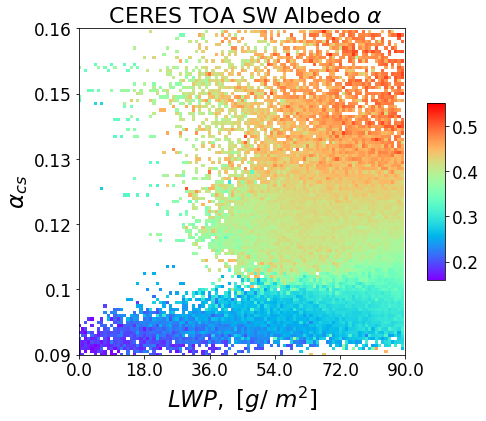

In [94]:
from matplotlib import cm
fig = plt.figure(figsize = (7.6, 6))
# plot settings:
parameters = {'axes.labelsize': 23, 'legend.fontsize': 16,  
       'axes.titlesize': 22, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)


# binned data by LWP:
BIN_lwp = np.linspace(0., 90., 101)
BIN_alphacs = np.linspace(0.09, 0.16, 101)

statistic_count, xedge, yedge, binnumber = binned_statistic_2d(1000.* lwp, ck_albedo, albedo, 'count', bins=[BIN_lwp, BIN_alphacs])
albedo_mean, xedge, yedge, binnumber = binned_statistic_2d(1000.* lwp, ck_albedo, albedo, 'mean', bins=[BIN_lwp, BIN_alphacs])

X_lwp = (BIN_lwp[0:-1] + (BIN_lwp[1] - BIN_lwp[0]) / 2.)
Y_albedocs = (BIN_alphacs[0:-1] + (BIN_alphacs[1] - BIN_alphacs[0]) / 2.)


print(statistic_count, binnumber)

ax1 = fig.add_subplot(111)

denc1 = ax1.imshow(albedo_mean.T, origin = 'lower', cmap = 'rainbow', vmin = 0.16, vmax = 0.55)

ax1.set_xticks(np.arange(0, len(BIN_lwp), 20))
ax1.set_xticklabels(labels= BIN_lwp[0::20])
# ax1.set_yticks(np.arange(0, len(BIN_alphacs)), 20)
# ax1.set_yticklabels(labels = np.round(BIN_alphacs[0::20], 2))
ax1.set_yticklabels(labels = np.round(BIN_alphacs[0::20], 2))
ax1.set_xlabel("$LWP,\ [g/\ m^{2}]$")
ax1.set_ylabel(r"$\alpha_{cs} $", fontsize = 23)
ax1.set_xlim(0, 101-1)
ax1.set_ylim(0, 101-1)

cb1 = fig.colorbar(denc1, ax = ax1, shrink = 0.54, aspect = 9.5)
# cb1.set_label(r"$ \alpha$", fontsize = 23)
plt.minorticks_off()

ax1.set_title(" CERES TOA SW Albedo "+r"$ \alpha$")

path_plot = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/plot_file/'
# plt.savefig(path_plot + "Fig_OBSRadia_schematic_RefFigpage29.jpg", bbox_inches = 'tight', dpi = 500)

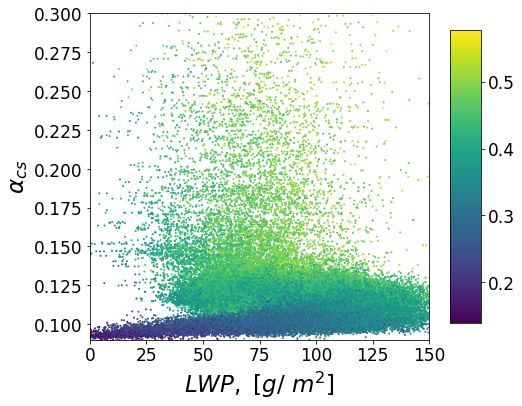

In [152]:
fig2 = plt.figure(figsize = (7.6, 6))
ax2 = fig2.add_subplot(111)
denc2 = ax2.scatter(1000.* lwp, ck_albedo, c = albedo, s = 1)

# ax1.set_xticks(np.arange(0, len(BIN_lwp), 20))
# ax1.set_xticklabels(labels= [0, 20, 40, 60 ,80])
# print(np.linspace(0., 100., 6))
# # ax1.set_yticks(np.arange(0, len(BIN_alphacs)), 20)
# ax1.set_yticklabels(labels = [0.11, 0.1])

ax2.set_xlabel("$LWP,\ [g/\ m^{2}]$")
ax2.set_ylabel(r"$\alpha_{cs} $")
ax2.set_xlim(0, 150)
ax2.set_ylim(0.09, 0.30)
cb2 = fig.colorbar(denc2, ax = ax2, shrink = 0.9, aspect = 9.5)


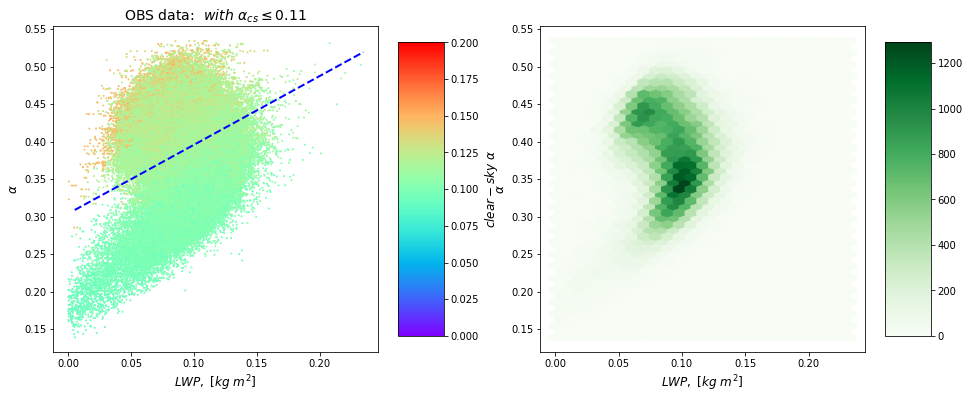

In [7]:
# PLoting: density plots of albedo versus LWP:
from matplotlib import cm
fig = plt.figure(figsize = (16, 6))

ax1 = fig.add_subplot(121)
denc1=ax1.scatter(lwp, albedo, c=ck_albedo, s = 1, cmap = cm.rainbow, vmin = 0, vmax = 0.20)

# denc1 = ax1.scatter(lwp[(ck_albedo>=0.13)& (ck_albedo<=0.16)], albedo[(ck_albedo>=0.13)& (ck_albedo<=0.16)], 
        # c = ck_albedo[(ck_albedo >=0.13)& (ck_albedo <=0.16)], s = 15,cmap = cm.rainbow)

ax1.plot(x_lwp, (x_lwp * coef_array_albedo_bin[0] + 0.115 * coef_array_albedo_bin[1] + coef_array_albedo_bin[2]), linewidth = 2.0, linestyle = '--', color = 'b', label = r'$binned\ LWP\ fit,/n\ \alpha_{cs} \lt 0')

ax1.set_xlabel("$LWP,\ [kg\ m^{2}]$", fontsize = 12)
ax1.set_ylabel(r"$\alpha $", fontsize = 12)
cb1 = fig.colorbar(denc1, ax = ax1, shrink = 0.9, aspect = 6.5)

cb1.set_label(r"$clear-sky\ \alpha$", fontsize = 12) 
ax1.set_title("OBS data: " + r"$\ with\ \alpha_{cs} \leq 0.11 $", fontsize = 14)  #  \ \alpha \leq 0.39 ; 0.13 \leq \alpha_{cs} \leq 0.16


ax2 = fig.add_subplot(122)

denc2 = ax2.hexbin(lwp, albedo, gridsize =(25, 25), cmap = plt.cm.Greens) # , cmap = plt.cm.Greens)

ax2.set_xlabel("$LWP,\ [kg\ m^{2}]$", fontsize = 12)
ax2.set_ylabel(r"$\alpha $", fontsize = 12)
cb2 = fig.colorbar(denc2, ax = ax2, shrink = 0.9, aspect = 6.5)

# plt.savefig(path6 + "pD_CERES-albedo_MAC-LWP_coloredbyCERES-albedo_cs_albedole0.11.jpg", bbox_inches ='tight') # 

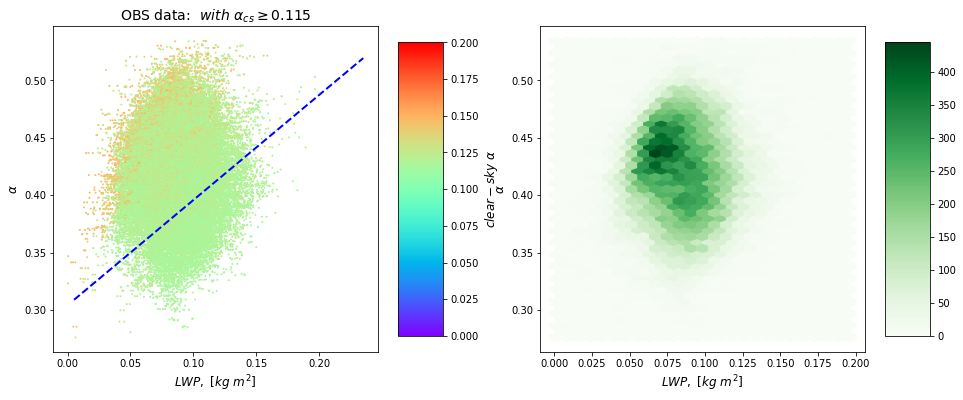

In [8]:
# PLoting: density plots of albedo versus LWP:
from matplotlib import cm
fig = plt.figure(figsize = (16, 6))

ax1 = fig.add_subplot(121)
# denc1=ax1.scatter(lwp, albedo, c=ck_albedo, s = 1, cmap = cm.rainbow, vmin = 0, vmax = 0.20)

denc1 = ax1.scatter(lwp[(ck_albedo>=0.115)], albedo[(ck_albedo>=0.115)], 
        c = ck_albedo[(ck_albedo >=0.115)], s = 1, cmap = cm.rainbow, vmin = 0, vmax = 0.20)

ax1.plot(x_lwp, (x_lwp * coef_array_albedo_bin[0] + 0.115 * coef_array_albedo_bin[1] + coef_array_albedo_bin[2]), linewidth = 2.0, linestyle = '--', color = 'b', label = r'$binned\ LWP\ fit,/n\ \alpha_{cs} \lt 0')

ax1.set_xlabel("$LWP,\ [kg\ m^{2}]$", fontsize = 12)
ax1.set_ylabel(r"$\alpha $", fontsize = 12)
cb1 = fig.colorbar(denc1, ax = ax1, shrink = 0.9, aspect = 6.5)

cb1.set_label(r"$clear-sky\ \alpha$", fontsize = 12)
ax1.set_title("OBS data: " + r"$\ with\ \alpha_{cs} \geq 0.115 $", fontsize = 14)  #  \ \alpha \leq 0.39 ; 0.13 \leq \alpha_{cs} \leq 0.16


ax2 = fig.add_subplot(122)

denc2 = ax2.hexbin(lwp[(ck_albedo>=0.115)], albedo[(ck_albedo>=0.115)], gridsize =(25, 25), cmap = plt.cm.Greens) # , cmap = plt.cm.Greens)

ax2.set_xlabel("$LWP,\ [kg\ m^{2}]$", fontsize = 12)
ax2.set_ylabel(r"$\alpha $", fontsize = 12)
cb2 = fig.colorbar(denc2, ax = ax2, shrink = 0.9, aspect = 6.5)

# plt.savefig(path6 + "CERES-albedo_MAC-LWP_coloredbyCERES-albedo_cs_albedole0.39.jpg", bbox_inches ='tight') # 

In [9]:
c = (0.175)/ 0.15
print(c)

1.1666666666666667


(45,) (360,)
(14, 45, 360)


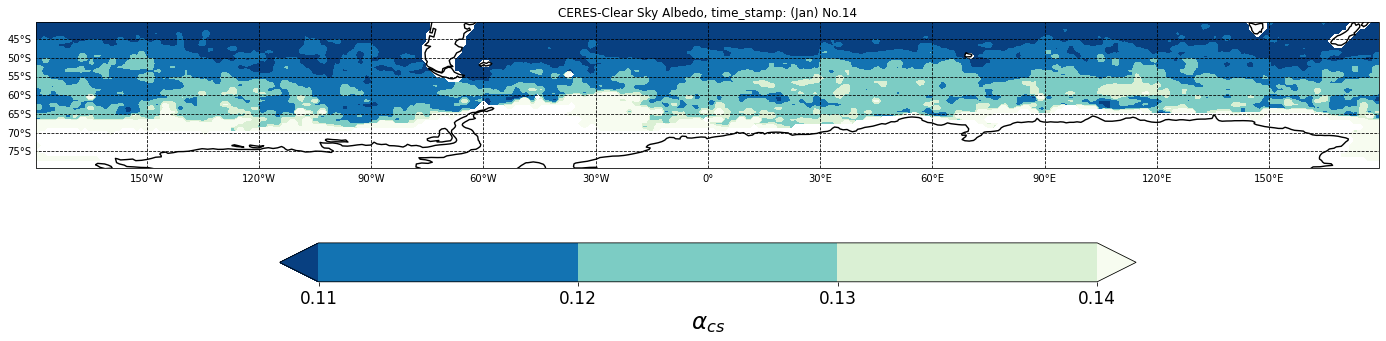

In [218]:
# Map for clear-sky albedo: Any January Month:

import cartopy.crs as ccrs   #..projection method
import cartopy.feature as cfeat
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
from matplotlib import cm
from copy import deepcopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Latitude and Longitude array:
LAT = lat_so
LON = lon_so
print(LAT.shape, LON.shape)
X, Y = np.meshgrid(LON, LAT)

# Propagate the 'nan' in CERES and MAC-LWP:
# copy data from dictionary:
x = deepcopy(dict2_training_var['LWP'])

y2 = deepcopy(dict2_training_var['alpha_cre'])

y1 = deepcopy(dict2_training_var['albedo'])

ck_a = deepcopy(dict2_training_var['albedo_cs'])

rsdt = deepcopy(dict2_training_var['rsdt'])

# conditions 1':
ck_a[rsdt < 10.0] = np.nan
ck_a[ck_a < 0] = np.nan

Z_training = (x * y1 * y2 * rsdt * ck_a) * 1.
ind_false = np.isnan(Z_training)
ind_true = np.logical_not(ind_false)

ck_a[ind_false] = np.nan
print(ck_a.shape)


# begin plotting
T_sp = 14

proj  = ccrs.PlateCarree()
fig101 = plt.figure(figsize=(8*3.2, 8.0*3.0))
# gs = GridSpec(5, 1, height_ratios=[3, 3, 3, 3, 1])

ax101 = plt.subplot(gs[0], projection= proj)

#..map attributes country border, coastline, Rivers, Lakes..
ax101.add_feature(cfeat.COASTLINE.with_scale('110m'), zorder=1, linewidth = 1.4)
clevel = np.arange(0.11, 0.15, 0.01)

contourf1 = ax101.contourf(X, Y, ck_a[T_sp-1, :, :], cmap = cm.GnBu_r, levels = clevel, extend='both')  # predict_label_LWP_PI[t_PI,:,:]
cb1 = fig101.colorbar(contourf1, ax = ax101, orientation='horizontal', label=r"$ \alpha_{cs}$", shrink = 0.64, pad = 0.29)
ax101.set_title("CERES-Clear Sky Albedo" + ", time_stamp: (Jan) No." + str(T_sp), fontsize = 12)
extent = [-180, 180, -85, -40]
gl = ax101.gridlines(crs = proj, draw_labels=True, linewidth = 0.8, color = 'k', alpha = 1.0, linestyle = '--', zorder = 99)

gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(extent[0], extent[1], 30.))
gl.ylocator = mticker.FixedLocator(np.arange(extent[2], extent[3], 5.))

# plt.savefig(path_data + "OBS_clearskyAlbedo.jpg", bbox_inches = 'tight', dpi = 120)
plt.show()

# GCM albedo v.s. LWP, colored by albedo_cs Checks

# GCM's albedo v.s LWP ; albedo_cs fitting lines:

In [4]:
### Try to replicate Daniel's methods:

import netCDF4
import numpy as np
import pandas
import glob
from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from scipy.stats import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from get_LWPCMIP5data import *
from get_LWPCMIP6data import *
from get_OBSLRMdata import *
from useful_func_cy import *
from fitLRM_cy1 import *
from fitLRM_cy2 import *

from fitLRMobs import *
from useful_func_cy import *
from calc_Radiation_LRM_1 import *
from calc_Radiation_LRM_2 import *
from calc_Radiation_OBS_2 import *

from area_mean import *
from binned_cyFunctions5 import *
from useful_func_cy import *

In [5]:
# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set are-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9

path1 = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'
path6 = '/glade/scratch/chuyan/Plots/CMIP_R_lwp_3/'
path_plot = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/plot_file/'

In [6]:
# GCMs lists:

exp = 'piControl'

# CMIP6: 31 (30: BCCCSMCM2MR)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
#             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

# CMIP5: 20 (18, ACCESS10, ACCESS13)

ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
inmcm4 = {'modn': 'inmcm4', 'consort': 'INM', 'cmip': 'cmip5', 
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
deck2  = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM21, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1, INM_CM48, MPIESM12LR, AWICM11MR, CMCCCM2SR5, CESM2WACCMFV2, CNRMCM61, CNRMCM61HR, ECEarth3, ECEarth3Veg, GISSE22G, MIROCES2L, NESM3, NorESM2MM, TaiESM1, BNUESM, CCSM4, CNRMCM5, CSIRO_Mk360, CanESM2, FGOALSg2, FGOALSs2, GFDLCM3, GISSE2H, GISSE2R, IPSLCM5ALR, MIROC5, MPIESMMR, NorESM1M, MIROCESM, MRICGCM3, MPIESMLR, bcccsm11, GFDLESM2G, GFDLESM2M]  #..current # 30 + 20

deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM21', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'INM_CM48', 'MPIESM12LR', 'AWICM11MR', 'CMCCCM2SR5', 'CESM2WACCMFV2', 'CNRMCM61', 'CNRMCM61HR', 'ECEarth3', 'ECEarth3Veg', 'GISSE22G', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'TaiESM1', 'BNUESM', 'CCSM4', 'CNRMCM5', 'CSIRO_Mk360', 'CanESM2', 'FGOALSg2', 'FGOALSs2', 'GFDLCM3', 'GISSE2H', 'GISSE2R', 'IPSLCM5ALR', 'MIROC5', 'MPIESMMR', 'NorESM1M', 'MIROCESM', 'MRICGCM3', 'MPIESMLR', 'bcccsm11', 'GFDLESM2G', 'GFDLESM2M']  #..current # 30 + 20 ('19': 'BCCCSMCM2MR';)

In [4]:
## Read two Regimes (Hot,Cold) data

output_ARRAY = {}   # storage output file
output_intermedia = {}   # storage the 'rawdata_dict'

output_dict0_PI = {}
output_dict0_abr = {}

output_GMT = {}
output_2lrm_predict = {}  # dict, store annualy, area_meaned prediction of LWP
output_2lrm_report = {}  # dict, store annually, area_meaned actual values of GCMs LWP
output_2lrm_coef_LWP = {}
output_2lrm_dict_albedo = {}  # Coefficients of 2 regimes's albedo trained by report 'LWP' data
# output_2lrm_coef_albedo_lL = {}

# Raw data
output_2lrm_yr_bin_abr = {}
output_2lrm_yr_bin_PI = {}
output_2lrm_mon_bin_abr = {}
output_2lrm_mon_bin_PI = {}

# Metric raw data in specific units:
shape_mon_pi = {}
shape_mon_abr = {}
output_2lrm_metric_actual_PI = {}
output_2lrm_metric_actual_abr = {}

# Statistic metrics of PI:
output_Mean_training = {}
output_Stdev_training = {}

# Predict metric data in specific units:
output_2lrm_mon_bin_LWPpredi_PI = {}
output_2lrm_mon_bin_LWPpredi_abr = {}
output_2lrm_DxDtG = {}

# Index for regime(s): Only for 2lrm
output_ind_Cold_PI = {}
output_ind_Hot_PI = {}
output_ind_Cold_abr = {}
output_ind_Hot_abr = {}

Tr_sst =  0.0

for i in range(len(deck2)):
    print("i", i)
    folder_2lrm = glob.glob(path1+deck2[i]['modn'] + '_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest' + '*' + '_dats.npz')
    print(len(folder_2lrm))
    if len(folder_2lrm) >2:
        if (len(folder_2lrm[1]) <  len(folder_2lrm[0])) & (len(folder_2lrm[1]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[0]) <  len(folder_2lrm[1])) & (len(folder_2lrm[0]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[0]
        else:
            folder_best2lrm = folder_2lrm[2]
        print(folder_best2lrm)
        
    
    elif len(folder_2lrm) != 1:
        if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
            folder_best2lrm = folder_2lrm[1]
        else:
            folder_best2lrm = folder_2lrm[0]
        print(folder_best2lrm)
        output_ARRAY[deck_nas2[i]] = load(folder_best2lrm, allow_pickle=True)  #+'_'+str(Tr_sst)
    
    else:
        output_ARRAY[deck_nas2[i]] = load(folder_2lrm[0], allow_pickle = True)  #+'_'+str(Tr_sst)
        print(folder_2lrm[0])
    
    # output_ARRAY[deck_nas2[i]] = load(folder_2lrm[0], allow_pickle = True)  #+'_'+str(Tr_sst)
    output_intermedia[deck_nas2[i]] = output_ARRAY[deck_nas2[i]]['rawdata_dict']
    
    output_GMT[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['GMT']
    output_2lrm_predict[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['predicted_metrics']
    output_2lrm_report[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['report_metrics']

    output_dict0_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_PI_var']
    output_dict0_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_abr_var']
    
    output_2lrm_coef_LWP[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Coef_dict']
    output_2lrm_dict_albedo[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['coef_dict_Albedo_pi']
    
    output_2lrm_DxDtG[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dX_dTg']
    
    # Monthly data
    output_2lrm_mon_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']
    output_2lrm_mon_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    # Annually data
    output_2lrm_yr_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_yr_bin_PI']
    output_2lrm_yr_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_yr_bin_abr']
    
    # Flattened Metric monthly mean bin data
    shape_mon_pi[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_PI_3']
    shape_mon_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_abr_3']
    output_2lrm_metric_actual_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['metric_training']
    output_2lrm_metric_actual_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['metric_predict']
    
    # Flattened Predicted monthly bin data
    output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_PI']
    output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_abr']
    
    # Statistic metrics of PI:
    output_Mean_training[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Mean_training']
    output_Stdev_training[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Stdev_training']
    
    # Indice for Regimes
    output_ind_Hot_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_PI']
    output_ind_Cold_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_PI']

    output_ind_Hot_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_abr']
    output_ind_Cold_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_abr']

print('Down read 2-LRM.')

i 0
3
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/BCC-ESM1_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-3.63_dats.npz
i 1
3
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CanESM5_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-12.91_dats.npz
i 2
3
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest0.28_dats.npz
i 3
3
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-FV2_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-0.42_dats.npz
i 4
3
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-WACCM_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest0.35_dats.npz
i 5
3
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CNRM-ESM2-1_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-1.55_dats.npz
i 6
3
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/GISS-E2-1-G_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-4.57_dats.npz
i 7
3
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/G

In [7]:
def radiative_transfer_model_test(data_dict, threshold_list, label = 'piControl'):
    # ---------------
    # 'data_dict' is the dictionary store the variables for calc radiative tranfer model (lwp, albedo, albedo_cs, ..)
    # 'threshold_list' is a list of the threshold values of 'albedo_cs': for filtering out the points with albedo_cs >= Threshold ;
    ## now calc two different radiative transfer models: 
    # M1. albedo = a1 * lwp + a2 * albedo_cs + a3;
    # M2. alpha_cre = albedo - albedo_cs = a1 * lwp + a2
    # ---------------

    coef_dict_Albedo = {}
    coef_dict_Alpha_cre = {}
    # Loop through filter threshold:
    for a in range(len(threshold_list)):

        TR_albedo_cs = threshold_list[a]

        # copy data from dictionary:

        x = deepcopy(data_dict['LWP'])

        y2 = deepcopy(data_dict['alpha_cre'])

        y1 = deepcopy(data_dict['albedo'])

        ck_a = deepcopy(data_dict['albedo_cs'])

        rsdt = deepcopy(data_dict['rsdt'])
        # conditions:
        rsdt[rsdt < 10.0] = np.nan
        ck_a[ck_a < 0] = np.nan
        ck_a[ck_a >= TR_albedo_cs] = np.nan

        # rsdt[rsdt < 10.0] = np.nan
        # ck_a[ck_a < 0] = np.nan
        # x[x >= np.nanpercentile(x, 95)] = np.nan
        print("threshold = ", TR_albedo_cs)

        # Processing 'nan' in aggregated data:
        Z_PI = (rsdt * ck_a * x * y2 * y1) * 1.
        ind_false = np.isnan(Z_PI)
        ind_true = np.logical_not(ind_false)

        print(" fration of not NaN points to All points" + " in "+label+ ": " + 
             str(np.asarray(np.nonzero(ind_true == True)).shape[1]/ len(ind_true.flatten())))

        # data_frame used for statsmodel:
        data = pandas.DataFrame({'x': x[ind_true].flatten(), 'y2': y2[ind_true].flatten(), 'y1': y1[ind_true].flatten(), 'ck_a': ck_a[ind_true].flatten()})

        # Fit the model
        model1 = ols("y2 ~ x", data).fit()
        model2 = ols("y1 ~ x + ck_a", data).fit()
        # print the summary
        print(" ")
        print("model1, alpha_cre = a1 * lwp + a2: ", ' ', model1.summary())
        print(" ")
        print("model2, albedo = a1* lwp + a2 * albedo_cs + a3: ", ' ', model2.summary())

        coef_array_alpha_cre = np.asarray([model1._results.params[1], model1._results.params[0]])
        coef_array_albedo = np.asarray([model2._results.params[1], model2._results.params[2], model2._results.params[0]])


        coef_dict_Albedo[str(threshold_list[a] *100.)] = coef_array_albedo
        coef_dict_Alpha_cre[str(threshold_list[a] *100.)] = coef_array_alpha_cre

    return coef_dict_Albedo, coef_dict_Alpha_cre


In [53]:
model_data = CESM2 #  AWICM11MR MRICGCM3 CanESM5 CESM2 GISSE21G


if model_data['cmip'] == 'cmip6':

    inputVar_pi, inputVar_abr = get_LWPCMIP6(**model_data)

elif model_data['cmip'] == 'cmip5':

    inputVar_pi, inputVar_abr = get_LWPCMIP5(**model_data)
else:
    
    print('not cmip6 & cmip5 data.')

# Radiation Change
# coef_array_alpha_cre_pi, coef_array_albedo_pi, coef_array_alpha_cre_abr, coef_array_albedo_abr = calc_Radiation_LRM_1(inputVar_pi, inputVar_abr, TR_albedo = 0.25)
# coef_array_alpha_cre_pi, coef_array_albedo_pi, coef_array_alpha_cre_abr, coef_array_albedo_abr = calc_Radiation_LRM_2(inputVar_pi, inputVar_abr)

# inputVar_pi, inputVar_abr are the data from read module: get_CMIP6data.py

#..get the shapes of monthly data
shape_lat = len(inputVar_pi['lat'])
shape_lon = len(inputVar_pi['lon'])
shape_time_pi = len(inputVar_pi['times'])
shape_time_abr = len(inputVar_abr['times'])
#print(shape_lat, shape_lon, shape_time_pi, shape_time_abr)


#..choose lat 40 -85 °S as the Southern-Ocean Regions
lons = inputVar_pi['lon'] *1.
lats = inputVar_pi['lat'][:] *1.

levels = np.array(inputVar_abr['pres'])
times_pi = inputVar_pi['times'] *1.
times_abr = inputVar_abr['times'] *1.

lati1 = -40.
latsi1 = min(range(len(lats)), key = lambda i: abs(lats[i] - lati1))
lati0 = -85.
latsi0 = min(range(len(lats)), key = lambda i: abs(lats[i] - lati0))
print('lat index for -85S; -40S', latsi0, latsi1)

shape_latSO = (latsi1+1) - latsi0
print('shape of latitudinal index in raw data: ', shape_latSO)


# Read the Radiation data and LWP
# piControl and abrupt-4xCO2
# LWP
LWP_pi = np.array(inputVar_pi['clwvi']) - np.array(inputVar_pi['clivi'])   #..units in kg m^-2
LWP_abr = np.array(inputVar_abr['clwvi']) - np.array(inputVar_abr['clivi'])   #..units in kg m^-2

# abnormal 'Liquid Water Path' value:
if np.min(LWP_abr) < -1e-3:
    LWP_abr = np.array(inputVar_abr['clwvi'])
    print('abr4x clwvi mislabeled')

if np.min(LWP_pi) < -1e-3:
    LWP_pi = np.array(inputVar_pi['clwvi'])
    print('piControl clwvi mislabeled')

# IWP
IWP_pi = np.array(inputVar_pi['clivi'])   #..units in kg m^-2
IWP_abr = np.array(inputVar_abr['clivi'])   #..units in kg m^-2

# SW radiation metrics
Rsdt_pi = np.array(inputVar_pi['rsdt'])
Rsut_pi = np.array(inputVar_pi['rsut'])
Rsutcs_pi = np.array(inputVar_pi['rsutcs'])

Rsdt_abr = np.array(inputVar_abr['rsdt'])
Rsut_abr = np.array(inputVar_abr['rsut'])
Rsutcs_abr = np.array(inputVar_abr['rsutcs'])

# albedo, albedo_clear sky; albedo(alpha)_cre: all-sky - clear-sky
Albedo_pi = Rsut_pi / Rsdt_pi
Albedo_cs_pi = Rsutcs_pi / Rsdt_pi
Alpha_cre_pi = Albedo_pi - Albedo_cs_pi

Albedo_abr = Rsut_abr / Rsdt_abr
Albedo_cs_abr = Rsutcs_abr / Rsdt_abr
Alpha_cre_abr = Albedo_abr - Albedo_cs_abr

# Pre-processing the data with abnormal values
Albedo_abr[(Albedo_cs_abr <= 0.08) & (Albedo_cs_abr >= 1.00)] = np.nan
Albedo_cs_abr[(Albedo_cs_abr <= 0.08) & (Albedo_cs_abr >= 1.00)] = np.nan
Alpha_cre_abr[(Albedo_cs_abr <= 0.08) & (Albedo_cs_abr >= 1.00)] = np.nan
LWP_abr[(Albedo_cs_abr <= 0.08) & (Albedo_cs_abr >= 1.00)] = np.nan
LWP_abr[LWP_abr >= np.nanpercentile(LWP_abr, 99.5)] = np.nan
IWP_abr[(Albedo_cs_abr <= 0.08) & (Albedo_cs_abr >= 1.00)] = np.nan
IWP_abr[IWP_abr >= np.nanpercentile(IWP_abr, 99.5)] = np.nan
Rsdt_abr[(Albedo_cs_abr <= 0.08) & (Albedo_cs_abr >= 1.00)] = np.nan

Albedo_pi[(Albedo_cs_pi <= 0.08) & (Albedo_cs_pi >= 1.00)] = np.nan
Albedo_cs_pi[(Albedo_cs_pi <= 0.08) & (Albedo_cs_pi >= 1.00)] = np.nan
Alpha_cre_pi[(Albedo_cs_pi <= 0.08) & (Albedo_cs_pi >= 1.00)] = np.nan
LWP_pi[(Albedo_cs_pi <= 0.08) & (Albedo_cs_pi >= 1.00)] = np.nan
LWP_pi[LWP_pi >= np.nanpercentile(LWP_pi, 99.5)] = np.nan
IWP_pi[(Albedo_cs_pi <= 0.08) & (Albedo_cs_pi >= 1.00)] = np.nan
IWP_pi[IWP_pi >= np.nanpercentile(IWP_pi, 99.5)] = np.nan
Rsdt_pi[(Albedo_cs_pi <= 0.08) & (Albedo_cs_pi >= 1.00)] = np.nan

# As data dictionary:
datavar_nas = ['LWP', 'IWP', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']   #..7 varisables except gmt (lon dimension diff)

dict0_PI_var = {'LWP': LWP_pi, 'IWP': IWP_pi, 'rsdt': Rsdt_pi, 'rsut': Rsut_pi, 'rsutcs': Rsutcs_pi, 'albedo' : Albedo_pi, 'albedo_cs': Albedo_cs_pi, 'alpha_cre': Alpha_cre_pi, 'lat': lats, 'lon': lons, 'times': times_pi, 'pres': levels}

dict0_abr_var = {'LWP': LWP_abr, 'IWP': IWP_abr, 'rsdt': Rsdt_abr, 'rsut': Rsut_abr, 'rsutcs': Rsutcs_abr, 'albedo': Albedo_abr, 'albedo_cs': Albedo_cs_abr, 'alpha_cre': Alpha_cre_abr, 'lat': lats, 'lon': lons, 'times': times_abr, 'pres': levels}

dict1_PI_var = deepcopy(dict0_PI_var)
dict1_abr_var = deepcopy(dict0_abr_var)

print('month in piControl and abrupt-4xCO2: ', times_pi[0,:][1], times_abr[0,:][1])

# Choose time frame: January
if times_pi[0,:][1] == 1.0:   # Jan
    shape_mon_PI_raw = dict0_PI_var['LWP'][0::12, latsi0:latsi1 +1,:].shape   # January data shape
    for i in range(len(datavar_nas)):
        dict1_PI_var[datavar_nas[i]] = dict1_PI_var[datavar_nas[i]][0::12, :, :]   # January data

else:
    shape_mon_PI_raw = dict0_PI_var['LWP'][int(13 - times_pi[0,:][1])::12, latsi0:latsi1 +1,:].shape 
    for i in range(len(datavar_nas)):
        dict1_PI_var[datavar_nas[i]] = dict1_PI_var[datavar_nas[i]][int(13 - times_pi[0,:][1])::12, :, :]

if times_abr[0,:][1] == 1.0:   # Jan
    shape_mon_abr_raw = dict0_abr_var['LWP'][0::12, latsi0:latsi1 +1,:].shape   # January data shape
    for j in range(len(datavar_nas)):
        dict1_abr_var[datavar_nas[j]] = dict1_abr_var[datavar_nas[j]][0::12, :, :]   # January data

else:
    shape_mon_abr_raw = dict0_abr_var['LWP'][int(13 - times_abr[0,:][1])::12, latsi0:latsi1 +1,:].shape 
    for j in range(len(datavar_nas)):
        dict1_abr_var[datavar_nas[j]] = dict1_abr_var[datavar_nas[j]][int(13 - times_abr[0,:][1])::12, :, :]


# Choose regional frame: SO (40 ~ 85 .S)
for c in range(len(datavar_nas)):
    dict1_PI_var[datavar_nas[c]] = dict1_PI_var[datavar_nas[c]][:,latsi0:latsi1+1, :]   # Southern Ocean data
    dict1_abr_var[datavar_nas[c]] = dict1_abr_var[datavar_nas[c]][:,latsi0:latsi1+1, :]  # Southern Ocean data

# radiative transfer model: single-regime LRM:
threshold_list = [0.11, 0.12, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 1.00]

# piControl:
coef_dict_Albedo_PI, coef_dict_Alpha_cre_PI = radiative_transfer_model_test(dict1_PI_var, threshold_list, label = 'piControl')

# compare: (abrupt4xCO2)
coef_dict_Albedo_abr, coef_dict_Alpha_cre_abr = radiative_transfer_model_test(dict1_abr_var, threshold_list, label = 'abrupt4xCO2')

# Plotting:
print(model_data)
# pLot_sca_sensitivity_to_albedo_cs(dict1_PI_var, coef_dict_Albedo_PI, threshold_list, c_albedo_cs=0.08, **model_data)
# return coef_dict_Alpha_cre_PI, coef_dict_Albedo_PI, coef_dict_Alpha_cre_abr, coef_dict_Albedo_abr



CESM2
1
/glade/scratch/chuyan/CMIP6data/
['/glade/scratch/chuyan/CMIP6data/pr_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc']
 Variable pr   abrupt-4xCO2


/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/read_hs_file.py:190: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  data = f.variables[varnm][ind]


type of dataOUT in read_hs_file <class 'numpy.ma.core.MaskedArray'>
(1800, 192, 288)
retrieve time:  [1, 1, 1] [150, 12, 31]
CESM2
1
/glade/scratch/chuyan/CMIP6data/
['/glade/scratch/chuyan/CMIP6data/ts_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc']
 Variable ts   abrupt-4xCO2
type of dataOUT in read_hs_file <class 'numpy.ma.core.MaskedArray'>
(1800, 192, 288)
CESM2
1
/glade/scratch/chuyan/CMIP6data/
['/glade/scratch/chuyan/CMIP6data/ta_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc']
 Variable ta   abrupt-4xCO2
type of dataOUT in read_hs_file <class 'numpy.ma.core.MaskedArray'>
(1800, 19, 192, 288)
CESM2
1
/glade/scratch/chuyan/CMIP6data/
['/glade/scratch/chuyan/CMIP6data/ps_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc']
 Variable ps   abrupt-4xCO2
type of dataOUT in read_hs_file <class 'numpy.ma.core.MaskedArray'>
(1800, 192, 288)
CESM2
1
/glade/scratch/chuyan/CMIP6data/
['/glade/scratch/chuyan/CMIP6data/wap_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc']

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in true_divide
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in true_divide
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in true_divide
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in less_equal
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in greater_equal
/glade/u/ssg/ch/usr/jupyterhub/en

month in piControl and abrupt-4xCO2:  1.0 1.0
threshold =  0.11
 fration of not NaN points to All points in piControl: 0.3562975274284798
 
model1, alpha_cre = a1 * lwp + a2:                                OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 3.005e+06
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:53:52   Log-Likelihood:             1.2144e+06
No. Observations:              497779   AIC:                        -2.429e+06
Df Residuals:                  497777   BIC:                        -2.429e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err

In [64]:
# copy data from dictionary:

rsdt = deepcopy(dict1_PI_var['rsdt'])
albedo = deepcopy(dict1_PI_var['albedo'])
ck_albedo = deepcopy(dict1_PI_var['albedo_cs'])
lwp = deepcopy(dict1_PI_var['LWP'])
iwp = deepcopy(dict1_PI_var['IWP'])


# conditions 1:
rsdt[rsdt < 10.0] = np.nan
ck_albedo[ck_albedo < 0] = np.nan
ck_albedo[ck_albedo >= 0.30] = np.nan

# Processing 'nan' in aggregated data:
Z_training = (rsdt * albedo * ck_albedo * lwp * iwp) * 1.
ind_false = np.isnan(Z_training)
ind_true = np.logical_not(ind_false)



albedo_gcm = albedo[ind_true].flatten()
print(albedo_gcm)
ck_albedo_gcm = ck_albedo[ind_true].flatten()
print(ck_albedo_gcm)
lwp_gcm = lwp[ind_true].flatten()
print(lwp_gcm)
iwp_gcm = iwp[ind_true].flatten()
print(iwp_gcm)

[0.4069006  0.33899724 0.33939454 ... 0.29349896 0.26953685 0.26907554]
[0.25989386 0.15234254 0.15209034 ... 0.10394254 0.09467198 0.09500834]
[0.07799813 0.08524501 0.08968572 ... 0.09034019 0.06237283 0.06569546]
[0.01209221 0.01087115 0.01019432 ... 0.01292225 0.01371049 0.01361851]


# Test the senstitivity of SW radiation to Change in IWP and LWP: June 19th, 2023

0.22012377 0.00044935732
0.07440718 1.6752492e-05
0.6008092 0.106240496


Text(0.5, 1.0, ' CESM2 TOA SW Albedo $ \\alpha$')

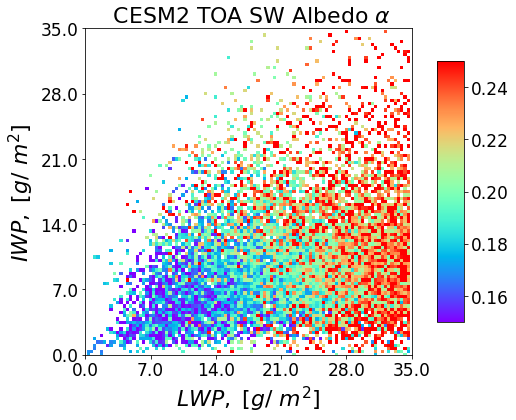

In [82]:
# PLoting GCM: density plots of albedo versus LWP:
from matplotlib import cm
import math
# plot settings:
parameters = {'axes.labelsize': 23, 'legend.fontsize': 16,  
       'axes.titlesize': 22, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)

fig2 = plt.figure(figsize = (9, 6))
ax21 = fig2.add_subplot(111)

print(np.nanmax(lwp_gcm), np.nanmin(lwp_gcm))
print(np.max(iwp_gcm), np.min(iwp_gcm))
print(np.max(albedo_gcm), np.min(albedo_gcm))


# binned data by LWP:
BIN_lwp = np.linspace(0., 35., 101)
BIN_iwp = np.linspace(0., 35., 101)

statistic_count, xedge, yedge, binnumber = binned_statistic_2d(1000.* lwp_gcm, 1000.* iwp_gcm, albedo_gcm, 'count', bins=[BIN_lwp, BIN_iwp])
albedo_mean, xedge, yedge, binnumber = binned_statistic_2d(1000.* lwp_gcm, 1000.* iwp_gcm, albedo_gcm, 'mean', bins=[BIN_lwp, BIN_iwp])

X_lwp = (BIN_lwp[0:-1] + (BIN_lwp[1] - BIN_lwp[0]) / 2.)
Y_iwp = (BIN_iwp[0:-1] + (BIN_iwp[1] - BIN_iwp[0]) / 2.)

# print(statistic_count, binnumber)
denc2 = ax21.imshow(albedo_mean.T, origin = 'lower', cmap = 'rainbow', vmin = 0.15, vmax = 0.25)

ax21.set_xticks(np.arange(0, len(BIN_lwp), 20))
ax21.set_xticklabels(labels= np.round(BIN_lwp[0::20], 1))
ax21.set_yticks(np.arange(0, len(BIN_iwp), 20))
# ax21.set_yticklabels(labels = np.round(BIN_alphacs[0::20], 2))
ax21.set_yticklabels(labels = np.round(BIN_iwp[0::20], 1))
ax21.set_xlabel("$LWP,\ [g/\ m^{2}]$", fontsize = 22)
ax21.set_ylabel(r"$IWP,\ [g/\ m^{2}]$", fontsize = 22)
ax21.set_xlim(0, 101-1)
ax21.set_ylim(0, 101-1)
cb2 = fig2.colorbar(denc2, ax = ax21, shrink = 0.80, aspect = 9.5)
plt.minorticks_off()

ax21.set_title(" CESM2 TOA SW Albedo "+r"$ \alpha$")

# plt.savefig(path_plot + "Fig_CESM2Radia2_Reffigbackupslide1.jpg", bbox_inches = 'tight', dpi = 500)

Text(0.5, 0.98, 'GCM: AWI-CM-1-1-MR ')

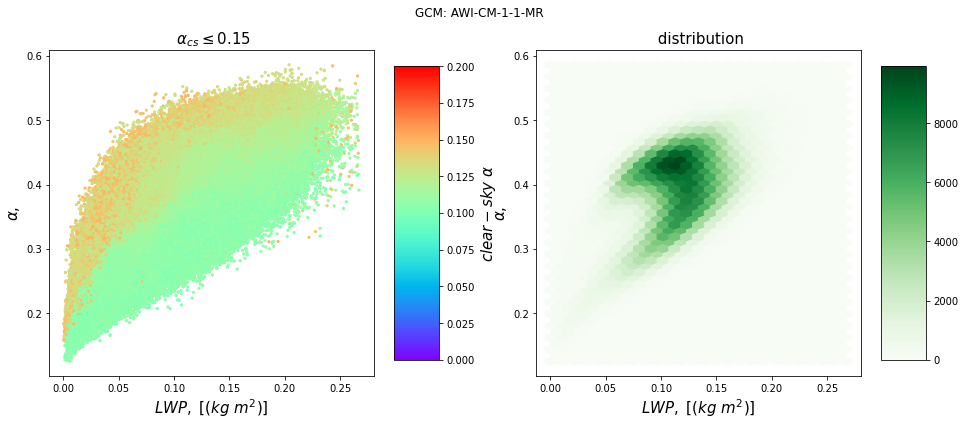

In [19]:
# PLoting GCM: density plots of albedo versus LWP:
from matplotlib import cm
import math
fig2 = plt.figure(figsize = (16, 6))
ax21 = fig2.add_subplot(121)

x = np.linspace(-0.005, 0.45, 50)
y = x

# scatter plot of specific gcm:
denc1 = ax21.scatter(lwp_gcm[(ck_albedo_gcm <= 0.15)], albedo_gcm[(ck_albedo_gcm<= 0.15)], 
                     c = ck_albedo_gcm[(ck_albedo_gcm<= 0.15)], s = 5, cmap = cm.rainbow, vmin = 0, vmax =0.2)

# print((lwp_gcm[(ck_albedo_gcm <= 0.15)]).reshape(1, -1))
# scac2=ax2.scatter(lwp_gcm[(ck_albedo_gcm>= 0.18)&(ck_albedo_gcm<= 0.25)],albedo_gcm[(ck_albedo_gcm>= 0.18)&(ck_albedo_gcm<= 0.25)]
                         # , c = ck_albedo_gcm[(ck_albedo_gcm>= 0.18)& (ck_albedo_gcm<= 0.25)],s = 15,cmap = cm.rainbow)

ax21.set_xlabel("$LWP,\ [(kg\ m^{2})]$", fontsize = 15)
ax21.set_ylabel(r"$\alpha,\ $", fontsize = 15)
cb21 = fig2.colorbar(denc1, shrink = 0.9, aspect = 6.5)
cb21.set_label(r"$clear-sky\ \alpha$", fontsize = 15)

# for i in range(len(deck2)):
#     ax2.plot(x, output_2lrm_coef_albedo[deck_nas2[40]][0]*x + output_2lrm_coef_albedo[deck_nas2[40]][1] * 0.1 + output_2lrm_coef_albedo[deck_nas2[40]][2], 
#                 label = deck2[40]['modn'])
# 
ax21.set_title(r"$\ \alpha_{cs} \leq 0.15 $", fontsize = 15)  # \ 0.18 \leq \alpha_{cs} \leq 0.25\ 

# dencity plot of the distributiob of points:

ax22 = fig2.add_subplot(122)

denc2 = ax22.hexbin(lwp_gcm[(ck_albedo_gcm <= 0.15)], albedo_gcm[(ck_albedo_gcm<= 0.15)], gridsize = (25, 25), cmap = plt.cm.Greens)

ax22.set_xlabel("$LWP,\ [(kg\ m^{2})]$", fontsize = 15)
ax22.set_ylabel(r"$\alpha,\ $", fontsize = 15)
cb22 = fig2.colorbar(denc2, ax = ax22, shrink = 0.9, aspect = 6.5)

ax22.set_title(" distribution", fontsize = 15)

plt.suptitle("GCM: " + model_data['modn'] + " ")

# plt.show()

# plt.savefig(path6 + "GCM: " + model_data['modn']+"_albedo_LWP(995per)_coloredby_albedo_cs0.15.jpg", bbox_inches ='tight')

## binned GCM test:

Albedo_cs threshold =  0.3
(24,)
[0.15665224 0.15438482 0.15821134 0.15843186 0.15486346 0.14943497
 0.14624979 0.1432408  0.13783805 0.13190016 0.12669819 0.12380974
 0.12198989 0.12095323 0.1204179  0.11980828 0.11988902 0.12015213
 0.12131584 0.12313987 0.12644323 0.13162455 0.13929801 0.14719117]
GCM model_binLWP, albedo_bin = a1 * lwp_bin + a2 * albedo_cs_bin + a3:                              OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     87.33
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           6.64e-11
Time:                        16:04:58   Log-Likelihood:                 58.010
No. Observations:                  24   AIC:                            -110.0
Df Residuals:                      21   BIC:                            -

Text(0.5, 1.0, 'binned GCM:AWI-CM-1-1-MR: 25 bins on albedo, LWP, albedo_cs')

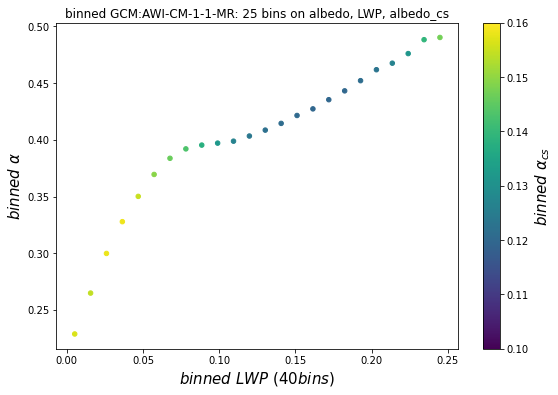

In [20]:
# radiative transfer model: single regime LRM:

threshold_list = [0.12, 0.15, 0.20, 0.30, 0.35, 0.50, 1.00]
# training :

TR_albedo_cs = threshold_list[3]
print("Albedo_cs threshold = ", TR_albedo_cs)


# copy data from dictionary:
x_GCM = deepcopy(dict1_PI_var['LWP'])

y2_GCM = deepcopy(dict1_PI_var['alpha_cre'])

y1_GCM = deepcopy(dict1_PI_var['albedo'])

ck_a_GCM = deepcopy(dict1_PI_var['albedo_cs'])

rsdt_GCM = deepcopy(dict1_PI_var['rsdt'])

# conditions 1:
rsdt_GCM[rsdt_GCM < 10.0] = np.nan
ck_a_GCM[ck_a_GCM < 0] = np.nan
ck_a_GCM[ck_a_GCM >= TR_albedo_cs] = np.nan

# Processing 'nan' in aggregated data:
Z_training_gcm = (rsdt_GCM * ck_a_GCM * x_GCM * y2_GCM * y1_GCM) * 1.
ind_false_gcm = np.isnan(Z_training_gcm)
ind_true_gcm = np.logical_not(ind_false_gcm)


# binned data by LWP:
BINS_lwp_gcm = np.linspace(0.00, 0.25, 25)
# print(x_GCM[ind_true_gcm])

mean_albedo_gcm, bin_edge1_gcm, binnumber_albedo_gcm = binned_statistic(x_GCM[ind_true_gcm], y1_GCM[ind_true_gcm], statistic='mean', bins = BINS_lwp_gcm)
mean_albedo_cs_gcm, bin_edge2_gcm, binnumber_albedo_cs_gcm = binned_statistic(x_GCM[ind_true_gcm], ck_a_GCM[ind_true_gcm], statistic='mean', bins = BINS_lwp_gcm)
x_lwp_gcm = (BINS_lwp_gcm[0:-1] + (BINS_lwp_gcm[1] - BINS_lwp_gcm[0]) / 2.)

# print(x_lwp_gcm)
print(mean_albedo_gcm.shape)
print(mean_albedo_cs_gcm)
# 

# print(" fration of not NaN points to All points" + " in OBS training data: " + 
#      str(np.asarray(np.nonzero(ind_true == True)).shape[1]/ len(ind_true.flatten())))
data_bin_gcm =  pandas.DataFrame({'y1': mean_albedo_gcm, 'ck_a': mean_albedo_cs_gcm, 'x': x_lwp_gcm})
model_binLWP_gcm = ols("y1 ~ x + ck_a", data_bin_gcm).fit()
print("GCM model_binLWP, albedo_bin = a1 * lwp_bin + a2 * albedo_cs_bin + a3: ", model_binLWP_gcm.summary())

coef_array_albedo_bin_gcm = np.asarray([model_binLWP_gcm._results.params[1], model_binLWP_gcm._results.params[2], model_binLWP_gcm._results.params[0]])
print(coef_array_albedo_bin_gcm)

# Plotting:
plt.figure(figsize = (9, 6))

plt.scatter(x_lwp_gcm, mean_albedo_gcm, c = mean_albedo_cs_gcm, s = 20, vmin = 0.10, vmax = 0.160)
cb4 = plt.colorbar()
cb4.set_label(r"$ binned\ \alpha_{cs}$", fontsize = 15)
plt.xlabel(r"$binned\ LWP\ (40 bins)$", fontsize = 15)
plt.ylabel(r"$binned\ \alpha$", fontsize = 15)

plt.title("binned GCM:" + model_data['modn'] +": 25 bins on albedo, LWP, albedo_cs")
# plt.savefig(path6+ "binned_GCM:" + model_data['modn'] + "(25).jpg", bbox_inches = 'tight', dpi = 100)

(49,) (384,)
(99, 49, 384)
(99, 49, 384)


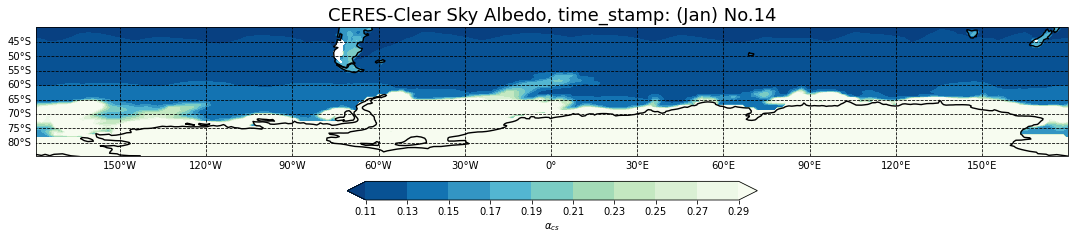

In [25]:
# Map for clear-sky albedo: Any January Month:

import cartopy.crs as ccrs   #..projection method
import cartopy.feature as cfeat
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
from matplotlib import cm
from copy import deepcopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Latitude and Longitude array:
LAT = dict0_PI_var['lat'][latsi0:latsi1+1]
LON = dict0_PI_var['lon']
print(LAT.shape, LON.shape)
X, Y = np.meshgrid(LON, LAT)

# Propagate the 'nan' in CERES and MAC-LWP:
# copy data from dictionary:
# copy data from dictionary:
x_GCM = deepcopy(dict1_PI_var['LWP'])

y2_GCM = deepcopy(dict1_PI_var['alpha_cre'])

y1_GCM = deepcopy(dict1_PI_var['albedo'])

ck_a_GCM = deepcopy(dict1_PI_var['albedo_cs'])
rsdt_GCM = deepcopy(dict1_PI_var['rsdt'])

print(ck_a_GCM.shape)

# conditions 1:
ck_a_GCM[rsdt_GCM < 10.0] = np.nan
ck_a_GCM[ck_a_GCM < 0] = np.nan
# ck_a_GCM[ck_a_GCM >= TR_albedo_cs] = np.nan

# Processing 'nan' in aggregated data:
Z_training_gcm = (rsdt_GCM * ck_a_GCM * x_GCM * y2_GCM * y1_GCM) * 1.
ind_false_gcm = np.isnan(Z_training_gcm)
ind_true_gcm = np.logical_not(ind_false_gcm)

ck_a_GCM[ind_false_gcm] = np.nan
print(ck_a_GCM.shape)


# begin plotting
T_sp = 14 

proj  = ccrs.PlateCarree()
fig101 = plt.figure( figsize=(14*1.5, 8.0 * 2.1))
gs = GridSpec(5, 1, height_ratios=[3, 3, 3, 3, 1])

ax101 = plt.subplot(gs[0], projection= proj)

#..map attributes country border, coastline, Rivers, Lakes..
ax101.add_feature(cfeat.COASTLINE.with_scale('110m'), zorder=1, linewidth = 1.4)
clevel = np.arange(0.11, 0.30, 0.02)

contourf1 = ax101.contourf(X, Y, ck_a_GCM[T_sp-1, :, :], cmap = cm.GnBu_r, levels = clevel, extend='both')  # predict_label_LWP_PI[t_PI,:,:]
cb1 = fig101.colorbar(contourf1, ax = ax101, orientation='horizontal', label=r"$ \alpha_{cs}$", shrink = 0.35, pad = 0.14)
ax101.set_title("CERES-Clear Sky Albedo" + ", time_stamp: (Jan) No." + str(T_sp), fontsize = 18)
extent = [-180, 180, -85, -40]
gl = ax101.gridlines(crs = proj, draw_labels=True, linewidth = 0.8, color = 'k', alpha = 1.0, linestyle = '--', zorder = 99)

gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(extent[0], extent[1], 30.))
gl.ylocator = mticker.FixedLocator(np.arange(extent[2], extent[3], 5.))

# plt.savefig(path6 + "clearskyAlbedo_GCM:" + model_data['modn'] + "_t" + str(T_sp) + ".jpg", bbox_inches = 'tight', dpi = 120)
plt.show()

In [ ]:
for i in range(len(deck_nas2)):
    print('no. ' + str(i), deck2[i]['modn'])
    print(output_2lrm_coef_albedo[deck_nas2[i]])
    

no. 0 BCC-ESM1
[0.9542883  0.74914026 0.15846432]
no. 1 CanESM5
[1.37487431 0.80944422 0.13299744]
no. 2 CESM2
[0.78366394 0.67972395 0.20282604]
no. 3 CESM2-FV2
[1.01473667 0.71806505 0.1783985 ]
no. 4 CESM2-WACCM
[0.78138085 0.67495208 0.20703991]
no. 5 CNRM-ESM2-1
[1.46251257 0.77156104 0.16192184]
no. 6 GISS-E2-1-G
[0.53313655 0.73038269 0.19182252]
no. 7 GISS-E2-1-H
[0.54066775 0.73147355 0.18896095]
no. 8 IPSL-CM6A-LR
[0.48980024 0.6771924  0.22665011]
no. 9 MRI-ESM2-0
[0.71538006 0.71455402 0.18657837]
no. 10 MIROC6
[0.61844769 0.697451   0.19354611]
no. 11 SAM0-UNICON
[1.742932   0.72595626 0.18131026]
no. 12 E3SM-1-0
[1.48509349 0.73567122 0.1546893 ]
no. 13 FGOALS-g3
[1.10375711 0.78748224 0.13479483]
no. 14 GFDL-CM4
[1.04434299 0.69416664 0.21259666]
no. 15 CAMS-CSM1-0
[0.94312326 0.56856421 0.27134913]
no. 16 INM-CM4-8
[1.76493504 0.75488605 0.16808663]
no. 17 MPI-ESM1-2-LR
[0.51730696 0.58147124 0.30112389]
no. 18 AWI-CM-1-1-MR
[0.46239267 0.59180887 0.29177156]
no. 19 CMC

In [ ]:
N_of_model = 45
# model_data = deck2[N_of_model]
print('model ', deck2[N_of_model]['modn'])

WD = '/glade/scratch/chuyan/CMIP_output/'

folder = glob.glob(WD+ deck_nas2[N_of_model]+'__'+ 'STAT_pi+abr_'+'22x_31y_Sep9th_anomalies'+ '.npz')
# print(folder)
output_ARRAY = np.load(folder[0], allow_pickle=True)  # str(TR_sst)
TR_sst1 = output_ARRAY['TR_minabias_SST']
TR_sub1 = output_ARRAY['TR_minabias_SUB']
TR_sst2 = output_ARRAY['TR_maxR2_SST']
TR_sub2 = output_ARRAY['TR_maxR2_SUB']

print("TR_min_abs(bias): " , TR_sst1, '  K ', TR_sub1 , ' Pa/s ')
print("TR_large_pi_R_2: ", TR_sst2, '  K ', TR_sub2 , ' Pa/s ')

THRESHOLD_sst = TR_sst2
THRESHOLD_sub = TR_sub2

calc_LRM_metrics(float(TR_sst2), float(TR_sub2), **deck2[N_of_model])
# calc_LRM_metrics(float(0.0), float(0.0), **deck[N_of_model])



In [ ]:
# get variable data
if model_data['cmip'] == 'cmip6':

    inputVar_pi, inputVar_abr = get_LWPCMIP6(**model_data)

elif model_data['cmip'] == 'cmip5':

    inputVar_pi, inputVar_abr = get_LWPCMIP5(**model_data)
else:
    print('not cmip6 & cmip5 data.')

# ******************************* #
# Radiation Change
# coef_array_alpha_cre_pi, coef_array_albedo_pi, coef_array_alpha_cre_abr, coef_array_albedo_abr = calc_Radiation_LRM_1(inputVar_pi, inputVar_abr, TR_albedo = 0.25)
coef_dict_Alpha_cre_pi, coef_dict_Albedo_pi, coef_dict_Alpha_cre_abr, coef_dict_Albedo_abr = calc_Radiation_LRM_2(inputVar_pi, inputVar_abr,  **model_data)